<a href="https://colab.research.google.com/github/SkandarEverest/praktikum_ml/blob/main/IF5140_K1_Praktikum_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Fadhil Rausyanfikr (23525046)

Batrisyia Zahrani Ananto (23525042)


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, VotingClassifier, StackingClassifier
from xgboost import XGBClassifier

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
df = pd.read_csv("/content/drive/MyDrive/machine learning/dataset/healthcare_dataset_crop.csv")

# Import Library & Dataset

[Link Dataset](https://drive.google.com/file/d/1ablJrJSnALI4pxSpiNYidOtNk7A8H6Zh/view?usp=drive_link)

Dataset ini digunakan untuk memprediksi hasil tes medis pasien berdasarkan informasi pasien seperti usia, gender, riwayat penyakit, kondisi medis, dsb. Dataset terdiri dari beberapa variabel fitur dan satu variabel target multiclass. Berikut keterangan terkait variabel dalam dataset:

1. Name: Nama pasien.
2. Age: Usia Pasien (tahun).
3. Gender: Jenis kelamin pasien (Male, Female).
4. Blood Type: Golongan darah pasien (A+, A-, O-, dst).
5. Medical Condition: Kondisi medis pasien (Diabetes, Hypertension, Asthma, dst).
6. Date of Admission: Tanggal pasien masuk rumah sakit (yyyy-mm-dd).
7. Doctor: Nama dokter yang bertanggung jawab terhadap pasien.
8. Hospital: Identitas rumah sakit atau fasilitas kesehatan tempat pasien dirawat.
9. Insurance Provider: Pemberi asuransi kesehatan pasien(Aetna, Blue Cross, Cigna, UnitedHealthCare, Medicare).
10. Billing Amount: jumlah tagihan untuk layanan kesehatan pasien.
11. Room Number: Nomor ruangan pasien selama dirawat di rumah sakit.
12. Admission Type: Jenis penerimaan pasien (Emergency, Elective, Urgent).
13. Discharge Date: Tanggal pasien keluar dari rumah sakit.
14. Medication: Resep obat yang diberikan kepada pasien selama perawatan (Aspirin, Ibuprofen, Penisilin, Parasetamol, Lipitor).
15. Test Result: Hasil tes medis pasien (Normal, Abnormal, Inconclusive)

# Exploratory Data Analysis (EDA)

**Descriptive Analysis**

Melakukan analisis pada dataset untuk mendapatkan gambaran singkat terkait dataset seperti jumlah kolom dan baris, tipe data, jumlah null values pada dataset, dan lain-lain.

**Visualization**

**Berikan contoh minimal 3 (tiga) visualisasi hasil eksplorasi dataset beserta penjelasan singkat untuk setiap visualisasi.**


In [6]:
df.head(20)

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,KIMBerLY taYLoR,55,Male,B-,Arthritis,2022-05-25,Andre Myers,Branch Ltd,Aetna,50799.300459,351,Elective,2022-05-29,Paracetamol,Inconclusive
1,emilY mOSley,80,Female,A-,Arthritis,2022-03-10,Victoria Burns,"Gonzales and Huff Young,",UnitedHealthcare,23129.562551,185,Urgent,2022-03-28,Penicillin,Inconclusive
2,REgiNA figUERoA,38,Male,O+,Obesity,2020-07-24,Keith Patton,"and Kim, Cox Pearson",Cigna,17160.524033,189,Emergency,2020-07-31,Lipitor,Normal
3,JeNniFeR FUEntEs,68,Male,B+,Asthma,2023-04-14,Tim Rodriguez,Brown LLC,Blue Cross,47742.588817,134,Urgent,2023-05-03,Penicillin,Abnormal
4,ERIC bArnEtt,21,Male,AB+,Cancer,2023-12-19,Rachel Hall,"Griffin Wilson, Martin and",Aetna,48776.877322,286,Urgent,2023-12-28,Lipitor,Abnormal
5,Scott bUTlEr,72,Male,B-,Obesity,2021-07-11,Lisa Woods,"Allen and Blackwell Morgan,",Medicare,11689.465868,299,Elective,2021-07-24,Aspirin,Normal
6,TAra SNYdeR,47,Female,B-,Hypertension,2020-05-30,Patricia Hubbard,"Miller and Tucker, Byrd",Blue Cross,41314.772217,386,Emergency,2020-06-26,Aspirin,Abnormal
7,bILlY JAMEs,46,Male,AB-,Hypertension,2020-01-11,Jason Sullivan,Miller-Bates,Medicare,29887.657207,220,Elective,2020-02-05,Ibuprofen,Inconclusive
8,THomAs matThEws,19,Male,O-,Diabetes,2022-11-22,Henry Stewart,"Morris, Johnson and Soto",Blue Cross,15774.781352,335,Urgent,2022-11-26,Penicillin,Normal
9,DESTInY TaYlor,52,Male,A-,Diabetes,2023-06-05,Scott Baker,Bailey Inc,Aetna,3813.734328,267,Elective,2023-06-21,Penicillin,Inconclusive


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27723 entries, 0 to 27722
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                27723 non-null  object 
 1   Age                 27723 non-null  int64  
 2   Gender              27723 non-null  object 
 3   Blood Type          27723 non-null  object 
 4   Medical Condition   27723 non-null  object 
 5   Date of Admission   27723 non-null  object 
 6   Doctor              27723 non-null  object 
 7   Hospital            27723 non-null  object 
 8   Insurance Provider  27723 non-null  object 
 9   Billing Amount      27723 non-null  float64
 10  Room Number         27723 non-null  int64  
 11  Admission Type      27723 non-null  object 
 12  Discharge Date      27723 non-null  object 
 13  Medication          27723 non-null  object 
 14  Test Results        27723 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 3.2

In [8]:
df.describe()

,Age,Billing Amount,Room Number
count,27723.000000,27723.000000,27723.000000
mean,51.542618,25499.736592,300.887747
std,19.554648,14181.872166,115.253178
min,13.000000,-1520.420555,101.000000
25%,35.000000,13271.504844,202.000000
50%,52.000000,25552.584216,302.000000
75%,68.000000,37664.798796,400.000000
max,89.000000,52764.276736,500.000000


In [9]:
df.isnull()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27718,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
27719,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
27720,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
27721,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


Visualisasi pertama adalah untuk data test result atau hasil tes pasien. Dapat dilihat bahwa berdasarkan data, hasil tes terbanyak adalah inconclusive atau tidak konklusif yang jumlahnya melebihi 10000 dan terendahnya adalah abnormal atau tidak normal yang jumlahnya tidak mencapai 8000.

<Axes: title={'center': 'Distribusi Test Result'}, xlabel='Test Results'>

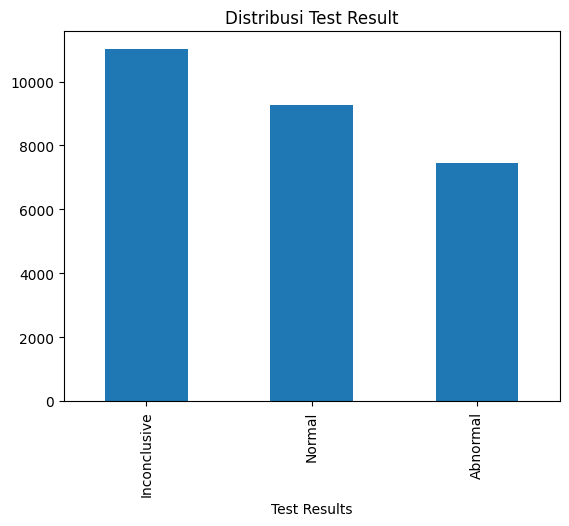

In [10]:
# Distribusi target
df["Test Results"].value_counts().plot(kind="bar", title="Distribusi Test Result")

Visualisasi kedua adalah untuk data kondisi medis yang dialami oleh pasien. Dapat dilihat bahwa berdasarkan data, persebaran kondisi medisnya cukup merata dan tidak terlihat ada perbedaan yang signifikan. Diabetes adalah kondisi medis terbanyak yang dialami.

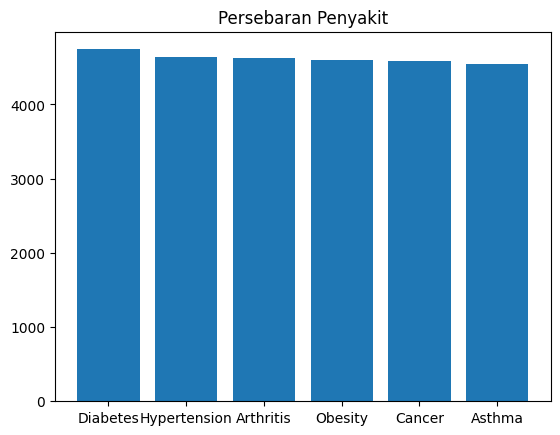

In [11]:
eda_df = df.copy()

plt.title("Persebaran Penyakit")
plt.bar(eda_df["Medical Condition"].value_counts().index, eda_df["Medical Condition"].value_counts())
plt.show()

Visualisasi ketiga adalah untuk data jenis penerimaan pasien. Dapat dilihat bahwa berdasarkan data, persebaran jenis penerimaannya cuku merata dan tidak terlihat ada perbedaan yang signifikan. Ketiganya memiliki jumlah diatas 8000.

<Axes: title={'center': 'Jenis Penerimaan'}, xlabel='Admission Type'>

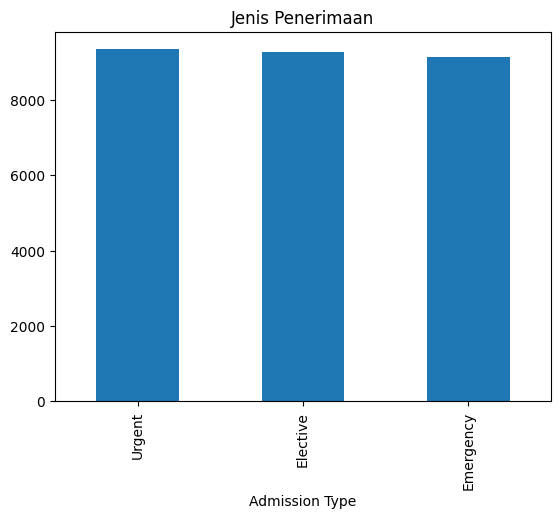

In [12]:
# Distribusi target
df["Admission Type"].value_counts().plot(kind="bar", title="Jenis Penerimaan")

# Data Preprocessing

Tahap ini dilakukan untuk mempersiapkan data sebelum nantinya menjadi input ke dalam model seperti split data train dan test.

**Lakukan seleksi fitur untuk mendapatkan akurasi yang baik pada model dan jelaskan mengapa fitur tersebut yang terpilih**

In [13]:
# Drop IDs and date columns
TARGET = "Test Results"
X = df.drop(columns=[
    TARGET, "Name", "Doctor", "Hospital", "Room Number",
    "Date of Admission", "Discharge Date"
], errors="ignore")
y = df[TARGET]

In [14]:
# Split train/test
X_train_raw, X_test_raw, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [15]:
# Separate numeric vs categorical before encoding
num_features = X.select_dtypes(include=np.number).columns.tolist()
cat_features = [c for c in X.columns if c not in num_features]

In [16]:
# One-hot encode categoricals
X_train = pd.get_dummies(X_train_raw, columns=cat_features)
X_test  = pd.get_dummies(X_test_raw,  columns=cat_features)

In [17]:
# Align test columns to train
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

In [18]:
le = LabelEncoder().fit(y_train)
y_train = le.transform(y_train)
y_test  = le.transform(y_test)

In [19]:
# Scale numeric features with StandardScaler
scaler = StandardScaler()
X_train[num_features] = scaler.fit_transform(X_train[num_features])
X_test[num_features]  = scaler.transform(X_test[num_features])

print("Train shape:", X_train.shape, "| Test shape:", X_test.shape)
print("Numeric features:", num_features)
print("Categorical features:", cat_features)

Train shape: (22178, 31) | Test shape: (5545, 31)
Numeric features: ['Age', 'Billing Amount']
Categorical features: ['Gender', 'Blood Type', 'Medical Condition', 'Insurance Provider', 'Admission Type', 'Medication']


In [20]:
print(X_train)

            Age  Billing Amount  Gender_Female  Gender_Male  Blood Type_A+  \
18764  0.481804       -1.564436          False         True          False   
10471 -1.152314        0.892663          False         True          False   
16430 -0.948049       -1.659012          False         True          False   
23193  0.941399       -0.543554          False         True          False   
23511 -1.050181        0.704237           True        False          False   
...         ...             ...            ...          ...            ...   
18544  1.707392       -1.307314           True        False          False   
20450  1.400995        0.440918          False         True          False   
9891  -0.896983        1.369836          False         True          False   
9689  -0.590586        0.209370          False         True          False   
11830  1.503127       -0.973736           True        False          False   

       Blood Type_A-  Blood Type_AB+  Blood Type_AB-  Blood Typ

# Modeling + Evaluation
Tahap ini merupakan tahap pembuatan model menggunakan data train untuk melatih model dan data test untuk melakukan evaluasi terhadap kinerja model.

In [21]:
# Helper function
def evaluate_model(name, model, X_train, y_train, X_test, y_test, le):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # show original class names (inverse-transform integers)
    y_true_labels = le.inverse_transform(y_test)
    y_pred_labels = le.inverse_transform(y_pred)
    labels = le.classes_

    print(f"\n=== {name} ===")
    print(classification_report(y_true_labels, y_pred_labels, zero_division=0))
    print("accuracy:", accuracy_score(y_true_labels, y_pred_labels))

    # fresh figure per call
    cm = confusion_matrix(y_true_labels, y_pred_labels, labels=labels)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=labels, yticklabels=labels)
    plt.title(f"Confusion Matrix — {name}")
    plt.show()

###Gradient Boosting

Decision Tree baseline memiliki akurasi sekitar 0.38 dengan macro average 0.37. Pada Gradient Boosting didapatkan akurasi 0.39 yang mana lebih tinggi daripada baseline, sedangkan macro averagenya lebih rendah sekitar 0.24. Gradient Boosting dan Decision Tree lebih sering memprediksi sebagai Inconclusive.



=== Baseline – DecisionTree ===
              precision    recall  f1-score   support

    Abnormal       0.30      0.31      0.31      1490
Inconclusive       0.43      0.43      0.43      2203
      Normal       0.37      0.36      0.37      1852

    accuracy                           0.38      5545
   macro avg       0.37      0.37      0.37      5545
weighted avg       0.38      0.38      0.38      5545

accuracy: 0.3751127141568981


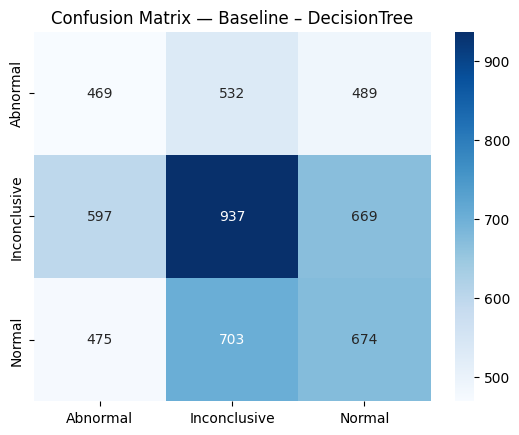

In [22]:
#Model Klasifikasi Decision Tree
dt = DecisionTreeClassifier(random_state=42)
evaluate_model("Baseline – DecisionTree", dt, X_train, y_train, X_test, y_test, le)


=== Ensemble – GradientBoosting ===
              precision    recall  f1-score   support

    Abnormal       0.39      0.01      0.02      1490
Inconclusive       0.40      0.90      0.55      2203
      Normal       0.34      0.09      0.14      1852

    accuracy                           0.39      5545
   macro avg       0.37      0.34      0.24      5545
weighted avg       0.37      0.39      0.27      5545

accuracy: 0.3927862939585212


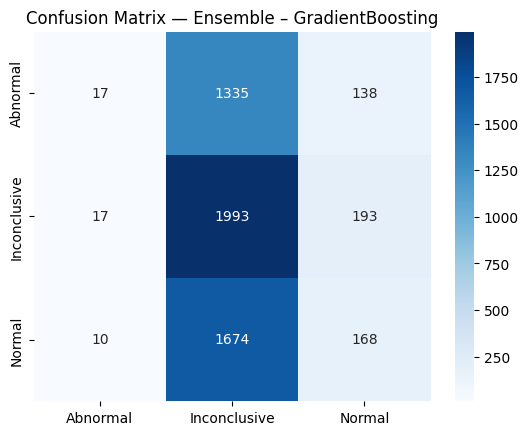

In [23]:
#Model Ensemble Gradient Boosting
gb = GradientBoostingClassifier(random_state=42)
evaluate_model("Ensemble – GradientBoosting", gb, X_train, y_train, X_test, y_test, le)

###Random Forest

Decision Tree baseline memiliki akurasi sekitar 0.38 dengan macro average 0.37. Pada Random Forest didapatkan akurasi 0.39 yang mana lebih tinggi daripada baseline, sedangkan macro averagenya sama di 0.37 juga. Random Forest dan Decision Tree lebih sering memprediksi sebagai Inconclusive.



=== Baseline – DecisionTree ===
              precision    recall  f1-score   support

    Abnormal       0.30      0.31      0.31      1490
Inconclusive       0.43      0.43      0.43      2203
      Normal       0.37      0.36      0.37      1852

    accuracy                           0.38      5545
   macro avg       0.37      0.37      0.37      5545
weighted avg       0.38      0.38      0.38      5545

accuracy: 0.3751127141568981


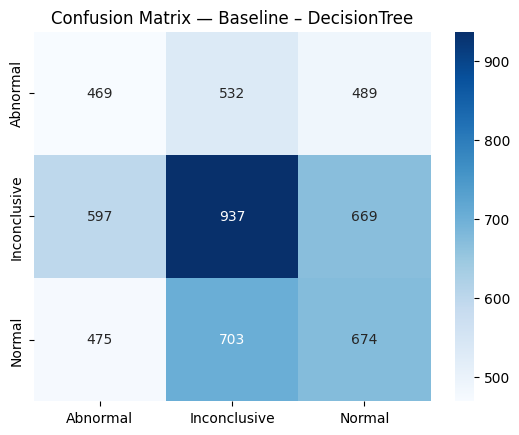

In [24]:
#Model Klasifikasi Decision Tree
dt = DecisionTreeClassifier(random_state=42)
evaluate_model("Baseline – DecisionTree", dt, X_train, y_train, X_test, y_test, le)


=== Ensemble – RandomForest ===
              precision    recall  f1-score   support

    Abnormal       0.31      0.22      0.26      1490
Inconclusive       0.43      0.54      0.48      2203
      Normal       0.38      0.35      0.37      1852

    accuracy                           0.39      5545
   macro avg       0.37      0.37      0.37      5545
weighted avg       0.38      0.39      0.38      5545

accuracy: 0.3926059513074842


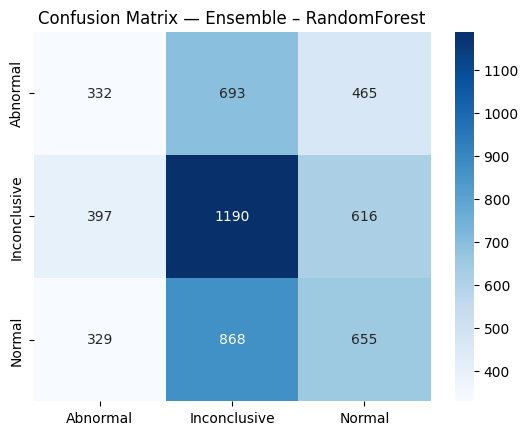

In [25]:
rf = RandomForestClassifier(n_estimators=300, random_state=42, n_jobs=-1)
evaluate_model("Ensemble – RandomForest", rf, X_train, y_train, X_test, y_test, le)

###Voting

Decision Tree baseline memiliki akurasi sekitar 0.38 dengan macro average 0.37. Pada Voting didapatkan akurasi 0.39 yang mana lebih tinggi daripada baseline, sedangkan macro averagenya lebih kecil di 0.33. Voting dan Decision Tree lebih sering memprediksi sebagai Inconclusive.



=== Baseline – DecisionTree ===
              precision    recall  f1-score   support

    Abnormal       0.30      0.31      0.31      1490
Inconclusive       0.43      0.43      0.43      2203
      Normal       0.37      0.36      0.37      1852

    accuracy                           0.38      5545
   macro avg       0.37      0.37      0.37      5545
weighted avg       0.38      0.38      0.38      5545

accuracy: 0.3751127141568981


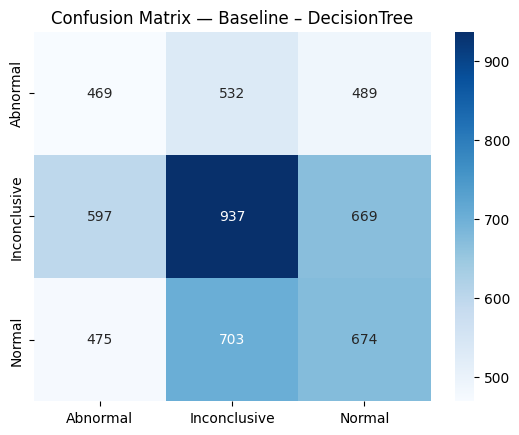

In [26]:
#Model Klasifikasi Decision Tree
dt = DecisionTreeClassifier(random_state=42)
evaluate_model("Baseline – DecisionTree", dt, X_train, y_train, X_test, y_test, le)


=== Ensemble – Voting (LR+DT+KNN) ===
              precision    recall  f1-score   support

    Abnormal       0.30      0.30      0.30      1490
Inconclusive       0.42      0.67      0.52      2203
      Normal       0.42      0.12      0.18      1852

    accuracy                           0.39      5545
   macro avg       0.38      0.36      0.33      5545
weighted avg       0.39      0.39      0.35      5545

accuracy: 0.38827772768259694


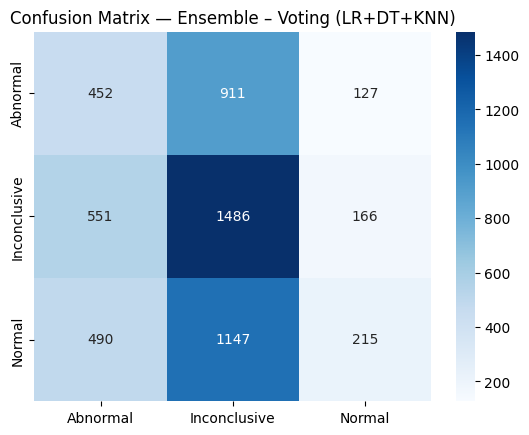

In [27]:
voting = VotingClassifier(
    estimators=[
        ("lr", LogisticRegression(max_iter=300, random_state=42)),
        ("dt", DecisionTreeClassifier(random_state=42)),
        ("knn", KNeighborsClassifier(n_neighbors=5))
    ],
    voting="hard", n_jobs=-1
)
evaluate_model("Ensemble – Voting (LR+DT+KNN)", voting, X_train, y_train, X_test, y_test, le)

###Stacking

Decision Tree baseline memiliki akurasi sekitar 0.38 dengan macro average 0.37. Pada Stacking didapatkan akurasi 0.41 yang mana lebih tinggi daripada baseline, sedangkan macro averagenya jauh lebih kecil di 0.28. Stacking dan Decision Tree lebih sering memprediksi sebagai Inconclusive.


=== Baseline – DecisionTree ===
              precision    recall  f1-score   support

    Abnormal       0.30      0.31      0.31      1490
Inconclusive       0.43      0.43      0.43      2203
      Normal       0.37      0.36      0.37      1852

    accuracy                           0.38      5545
   macro avg       0.37      0.37      0.37      5545
weighted avg       0.38      0.38      0.38      5545

accuracy: 0.3751127141568981


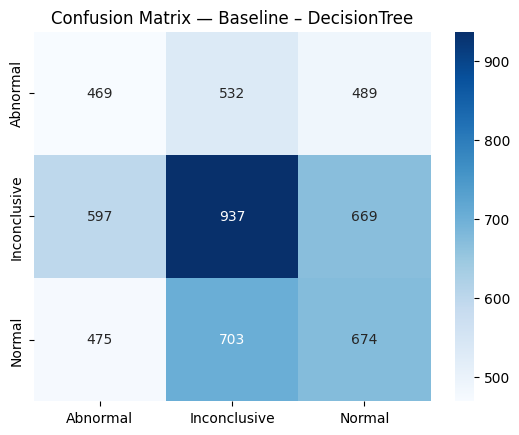

In [28]:
#Model Klasifikasi Decision Tree
dt = DecisionTreeClassifier(random_state=42)
evaluate_model("Baseline – DecisionTree", dt, X_train, y_train, X_test, y_test, le)


=== Ensemble – Stacking (LR+DT+KNN) ===
              precision    recall  f1-score   support

    Abnormal       0.00      0.00      0.00      1490
Inconclusive       0.41      0.83      0.55      2203
      Normal       0.39      0.23      0.29      1852

    accuracy                           0.41      5545
   macro avg       0.27      0.35      0.28      5545
weighted avg       0.29      0.41      0.31      5545

accuracy: 0.40577096483318303


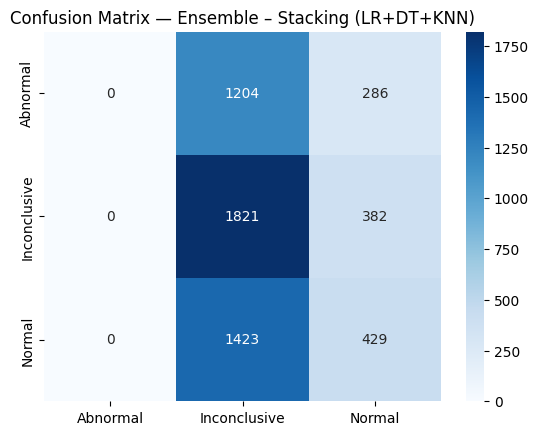

In [29]:
# Model 2: Stacking ensemble (base estimators + meta-learner)
stacking = StackingClassifier(
    estimators=[
        ('lr', LogisticRegression(max_iter=1000, random_state=42)),
        ('dt', DecisionTreeClassifier(random_state=42)),
        ('knn', KNeighborsClassifier())
    ],
    final_estimator=LogisticRegression(max_iter=1000, random_state=42),  # meta-learner
    n_jobs=-1
)

# Evaluasi model stacking
evaluate_model("Ensemble – Stacking (LR+DT+KNN)", stacking, X_train, y_train, X_test, y_test, le)


###XGBoost

Decision Tree baseline memiliki akurasi sekitar 0.38 dengan macro average 0.37. Pada XGBoost didapatkan akurasi 0.38 yang mana sama dengan baseline, sedangkan macro averagenya lebih kecil di 0.32. XGBoost dan Decision Tree lebih sering memprediksi sebagai Inconclusive.


=== Baseline – DecisionTree ===
              precision    recall  f1-score   support

    Abnormal       0.30      0.31      0.31      1490
Inconclusive       0.43      0.43      0.43      2203
      Normal       0.37      0.36      0.37      1852

    accuracy                           0.38      5545
   macro avg       0.37      0.37      0.37      5545
weighted avg       0.38      0.38      0.38      5545

accuracy: 0.3751127141568981


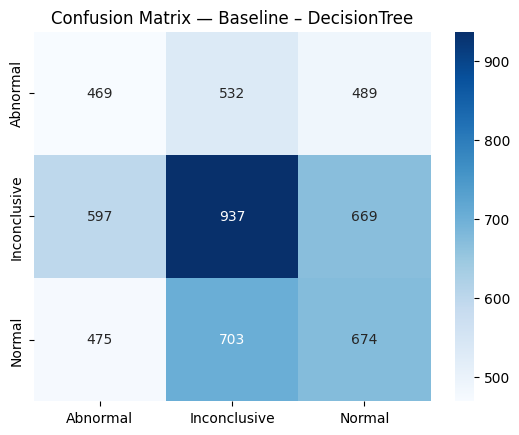

In [30]:
#Model Klasifikasi Decision Tree
dt = DecisionTreeClassifier(random_state=42)
evaluate_model("Baseline – DecisionTree", dt, X_train, y_train, X_test, y_test, le)


=== Ensemble – XGBoost ===
              precision    recall  f1-score   support

    Abnormal       0.31      0.09      0.14      1490
Inconclusive       0.40      0.63      0.49      2203
      Normal       0.35      0.31      0.33      1852

    accuracy                           0.38      5545
   macro avg       0.35      0.34      0.32      5545
weighted avg       0.36      0.38      0.34      5545

accuracy: 0.37709648331830475


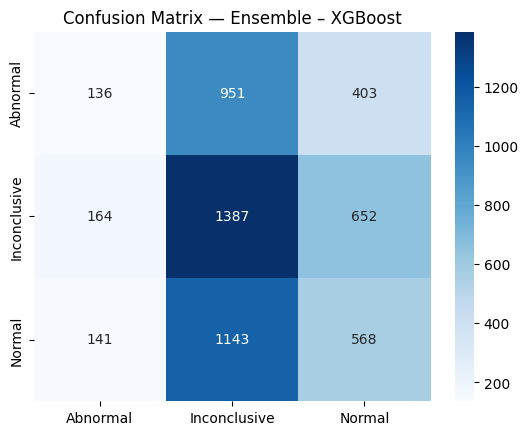

In [31]:
xgb = XGBClassifier(
    n_estimators=400, learning_rate=0.05, max_depth=6,
    subsample=0.9, colsample_bytree=0.9, random_state=42,
    eval_metric="mlogloss"
)
evaluate_model("Ensemble – XGBoost", xgb, X_train, y_train, X_test, y_test, le)

# Kesimpulan

**Analisis model terbaik dan berikan alasan mengapa kinerja paling baik di antara model-model yang lain.**

Model terbaik adalah Random Forest karena meskipun meiliki akurasi bukan yang paling tinggi diantara yang lainnya, akan tetapi akurasi dan macro averagenya tidak timpang dan sama-sama cukup tinggi. Selain itu, semua model cenderung memprediksi hasil sebagai inconclusive.